# Signal Processing Crash Course

### Tirtadwipa Manunggal (https://github.com/linerocks)

## Waves

Let's take a look at this audio. At a glance, this audio seems chaotic and likely hard to extract the information. But when we zoom bigger at certain range of index, we can obviously see a pattern. The signal has a **periodic** pattern and smoothly sweeps into other **periodic** pattern.

**Import scipy, matplotlib, and sounddevice**

In [1]:
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
import sounddevice as sd

**Read audio**

In [2]:
fs, x = wav.read('data/audio.wav')
sd.play(x, fs)

**Plot audio wave**

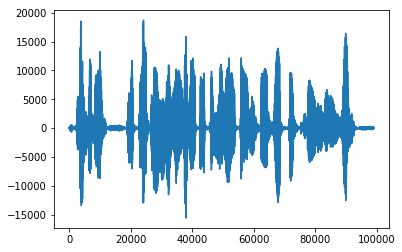

In [3]:
plt.plot(x)

**Zoom the plot**

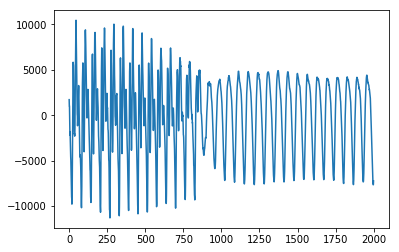

In [4]:
plt.plot(x[28000:30000])
plt.rcParams['figure.figsize'] = (10, 4)

Speaking of which audio originated from, we should revisit it as a waves or signal (the term is used interchangeably). As like we hypen previously, **periodic pattern** is the key for processing waves. Yet, before dive into **polytone pattern**, we need to step back a little and try building our wave from scratch so that we grasp better understanding about **periodic pattern**. Let's do some math <sup><a href='#1'>[1]</a></sup>.

$$ y = f(t) = A \ sin(\omega t) \ = A \ sin(2 \pi ft)$$

where 
$A$ is signal amplitude, $f$ is frequency, **$t$** is time index. Or we  can code as follows,

**Import numpy**

In [5]:
import numpy as np

**Define constants needed**

In [6]:
t = np.linspace(0, 1, fs)  # samples
A = 1                      # arbitrary unit
f = 220                    # Hz

**Create simple wave**

In [7]:
y = A * np.sin(2 * np.pi * f * t)

**Plot the wave**

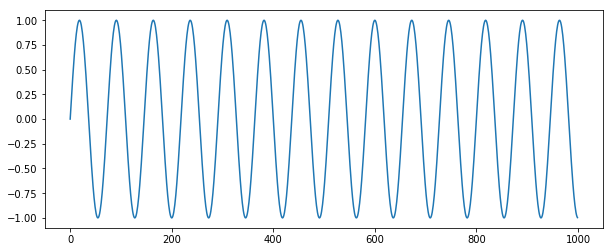

In [8]:
plt.plot(y[0:1000])

**Play the wave**

In [9]:
sd.play(y, fs)

We can play further by adding other frequency components and adjusting the amplitude. Suppose we are creating mixture wave with $f_1 = 220\ Hz$ and $f_2 = 600\ Hz$ which weighted 0.6 and 0.4 for $A1$ and $A2$ respectively or notated as

$$y_m = A_1 \ sin(2 \pi f_1 t) + A_2 \ sin(2 \pi f_2 t)$$

**Define our mixture components**

In [10]:
A1 = 0.6
f1 = 220
A2 = 0.4
f2 = 600

**Create our compound wave**

In [11]:
y_m = A1 * np.sin(2 * np.pi * f1 * t) + A2 * np.sin(2 * np.pi * f2 * t)

**Plot the wave**

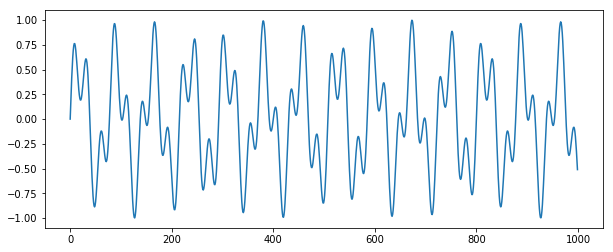

In [12]:
plt.plot(y_m[0:1000])

**Play the wave**

In [13]:
sd.play(y_m, fs)

Let's having fun a while.

In [14]:
def music_score(score):
    y = np.zeros(0)
    for i in score:
        t = np.linspace(0, 1, i[1] * 16) # milisecond
        x = np.sin(2 * np.pi * i[0] * t)
        y = np.append(y, x)
    return y    

In [15]:
# Do re mi
score = [
    [440, 1500],     # A4
    [493.16, 1500],  # B4
    [554.25, 1500],  # C5
    [587.33, 1500],  # D5
    [659.25, 1500],  # E5
    [739.98, 1500],  # F5
    [830.61, 1500],  # G5
    [880.00, 1500],  # A5
]
y_doremi = music_score(score)
sd.play(y_doremi)

In [16]:
# Super Mario
score = [
    [330.0, 200], [0.0, 300], [330.0, 200], [0.0, 600], [330.0, 200], [0.0, 600], [255.0, 200], [0.0, 200], [330.0, 200], [0.0, 600], [385.0, 200], [0.0, 1100], [190.0, 200], [0.0, 1150], [255.0, 200], [0.0, 900], [190.0, 200], [0.0, 800], [160.0, 200], [0.0, 1000], [220.0, 200], [0.0, 600], [240.0, 160], [0.0, 660], [225.0, 200], [0.0, 300], [215.0, 200], [0.0, 600], [190.0, 200], [0.0, 400], [330.0, 160], [0.0, 400], [380.0, 100], [0.0, 300], [430.0, 200], [0.0, 600], [350.0, 160], [0.0, 300], [380.0, 100], [0.0, 700], [330.0, 160], [0.0, 600], [260.0, 160], [0.0, 300], [290.0, 160], [0.0, 300], [240.0, 160], [0.0, 1000], [255.0, 200], [0.0, 900], [190.0, 200], [0.0, 800], [160.0, 200], [0.0, 1000], [220.0, 200], [0.0, 600], [240.0, 160], [0.0, 660], [225.0, 200], [0.0, 300], [215.0, 200], [0.0, 600], [190.0, 200], [0.0, 400], [330.0, 160], [0.0, 400], [380.0, 100], [0.0, 300], [430.0, 200], [0.0, 600], [350.0, 160], [0.0, 300], [380.0, 100], [0.0, 700], [330.0, 160], [0.0, 600], [260.0, 160], [0.0, 300], [290.0, 160], [0.0, 300], [240.0, 160], [0.0, 1000], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 440], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 400], [0.0, 600], [510.0, 160], [0.0, 600], [510.0, 160], [0.0, 300], [510.0, 160], [0.0, 600], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 840], [292.5, 200], [0.0, 900], [275.0, 200], [0.0, 840], [250.0, 200], [0.0, 720], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [250.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 440], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 400], [0.0, 600], [510.0, 160], [0.0, 600], [510.0, 160], [0.0, 300], [510.0, 160], [0.0, 600], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [380.0, 200], [0.0, 200], [360.0, 200], [0.0, 300], [340.0, 200], [0.0, 300], [310.0, 300], [0.0, 600], [325.0, 300], [0.0, 600], [190.0, 200], [0.0, 300], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [215.0, 200], [0.0, 300], [250.0, 200], [0.0, 200], [285.0, 200], [0.0, 840], [292.5, 200], [0.0, 900], [275.0, 200], [0.0, 840], [250.0, 200], [0.0, 720], [190.0, 200], [0.0, 600], [250.0, 200], [0.0, 600], [250.0, 200], [0.0, 300], [250.0, 200], [0.0, 600], [250.0, 120], [0.0, 300], [250.0, 160], [0.0, 600], [250.0, 120], [0.0, 700], [250.0, 160], [0.0, 300], [290.0, 160], [0.0, 700], [330.0, 160], [0.0, 300], [250.0, 160], [0.0, 600], [215.0, 160], [0.0, 300], [190.0, 160], [0.0, 1200], [250.0, 120], [0.0, 300], [250.0, 160], [0.0, 600], [250.0, 120], [0.0, 700], [250.0, 160], [0.0, 300], [290.0, 160], [0.0, 300], [330.0, 160], [0.0, 1100], [435.0, 160], [0.0, 650], [380.0, 160], [0.0, 1200], [250.0, 120], [0.0, 300], [250.0, 160], [0.0, 600], [250.0, 120], [0.0, 700], [250.0, 160], [0.0, 300], [290.0, 160], [0.0, 700], [330.0, 160], [0.0, 300], [250.0, 160], [0.0, 600], [215.0, 160], [0.0, 300], [190.0, 160], [0.0, 1200], [330.0, 200], [0.0, 300], [330.0, 200], [0.0, 600], [330.0, 200], [0.0, 600], [255.0, 200], [0.0, 200], [330.0, 200], [0.0, 600], [385.0, 200], [0.0, 1100], [190.0, 200], [0.0, 1150]
]
y_mario = music_score(score)
sd.play(y_mario)

## Transformation : Fourier Transform

As we start speaking about frequency, we have to deal the frequency within the audio signal using such a representation to make data less chaotic. _**Joseph Fourier**_ introduced such series which later derived a methods namely _**Fourier Transform**_. This method breaks down the frequency components into an orthogonal series representing th e audio. _**Fourier Transform**_ is noted as
$$F(k) = \frac{1}{T}\ \int_{-\frac{T}{2}}^{\frac{T}{2}} f(t)\ e^{-2\pi\ i\ \frac{k}{T}\ t}\ dt$$
where :<br>

- $f(t)$ is time-domain function (_simply_ our signal)
- $e$ is Euler's number 2.718281828459....
- $k$ is frequency index
- $i$ is imaginary number for $\sqrt{-1}$ (or sometimes people use literal $j$ a.k.a. _jmaginary_ :D)
- $T$ is time period

But let's leave all the hassle this part and use numpy **Fourier Transform** instead. Note that **Fourier Transform** yields _complex number_ so the result has _real_ and _imaginary_ component. In addition, the yielded spectrum is <a href="https://en.wikipedia.org/wiki/Hermitian_function"><i>conjugate symmetric</i></a>. Thus, we need to turn the _complex number_ into it's absolute form and cut into a half.

If we want to be more accurate, finding absolute form of spectrum should be calculated as power,

$$P(k) = F(k)\ F(k)^{*}$$

Asterix sign notes conjugation. But we will leave it for simplicity.

**Transform the monotone signal**

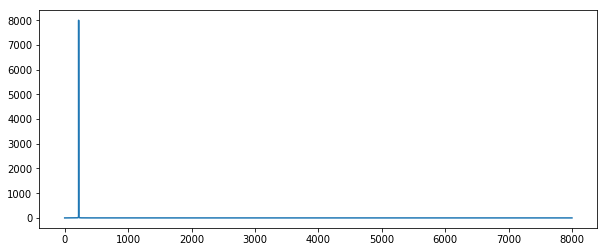

In [17]:
# Monotone signal
Y = np.abs(np.fft.fft(y))
plt.plot(Y[0:np.int(Y.size/2)])

**Transform the dualtone signal**

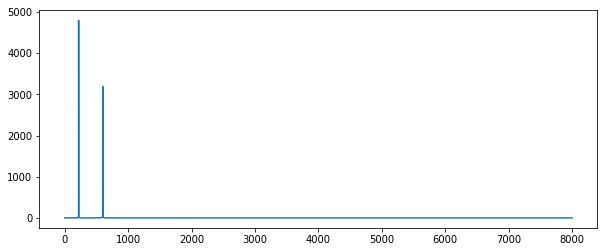

In [18]:
# Dualtone signal
Y_m = np.abs(np.fft.fft(y_m))
plt.plot(Y_m[0:np.int(Y_m.size/2)])

**Transform polytone signal**

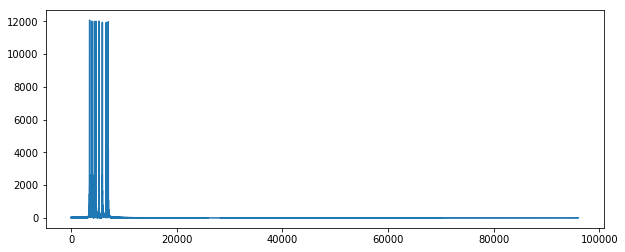

In [19]:
# Doremi signal
Y_doremi = np.abs(np.fft.fft(y_doremi))
plt.plot(Y_doremi[0:np.int(Y_doremi.size/2)])

**Transform the monotone signal**

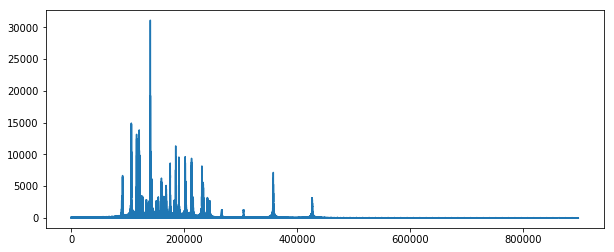

In [20]:
# Mario signal
Y_mario = np.abs(np.fft.fft(y_mario))
plt.plot(Y_mario[0:np.int(Y_mario.size/2)])

**Transform the speech**

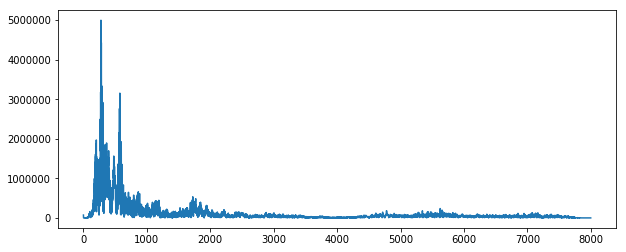

In [21]:
# Speech signal
X = np.abs(np.fft.fft(x[1:fs]))
plt.plot(X[0:np.int(X.size/2)])

## Transformation : Short Time Fourier Transform

Applying **Fourier Transform** upon a signal would diminish temporal information as the time index $t$ turns into frequency index $k$. In point of fact, this temporal information can be extremely useful if come along the spectral information. It's why people come across a method coping this idea. The method is renownedly called **Short Time Fourier Transform**. Instead of transforming whole signal at once, we split the signal into smaller chunk overlapping each other and transform each chunk locally. STFT workflow is best described by figure below,

![figure1](img/fig1.png)

<sub><b>figure 1</b> : image is taken from  http://inacl.id/journal/index.php/jlk/article/view/2</sub>


STFT has hopping distance constants for each chunk which is therefore managed by time frame, yet each hop need to be weighed by a **window function** so that transition of one chunk to next door chunk can be reunited well later. 

Here we introduce term **window function**. Frankly describing, **window function** is a weighing function. There are a lot of **window function** and every of them has unique characteristic. For this tutorial, we will pick one which is well-know and widely used, **Hamming Window** <sup><a href='#2'>[2]</a></sup> which is defined as,
$$H[n] = 0.54 - 0.46\ cos \left[ \frac{2\pi n}{N - 1} \right]$$

**Define our frame size**

In [23]:
# Our constant for frame size
N = 512

**Create arbitrary signal**

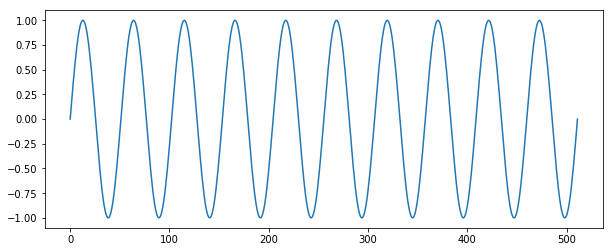

In [24]:
# Arbitrary wave
chunk = np.sin(2 * np.pi * 10 * np.linspace(0, 1, N))
plt.plot(chunk)

**Create our window**

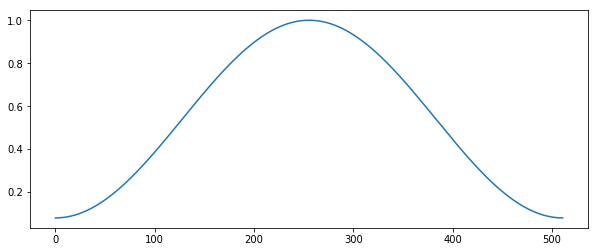

In [25]:
# Window function
H = 0.54 - 0.46 *  np.cos(np.arange(0, N) * 2 * np.pi / (N - 1))
plt.plot(H)

**Apply the window**

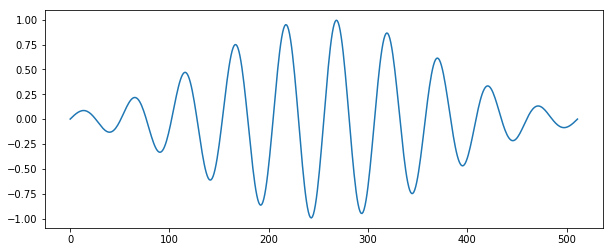

In [26]:
# Windowed wave
frame = np.multiply(chunk, H)
plt.plot(frame)

Moving on to advanced step, let's chunk our audio for real.

**Wrap STFT into a function**

In [27]:
def STFT(x, N = 512, overlap = 0.5) :
    if overlap > 0.5 :
        overlap = 0.5
    elif overlap < 0.1 :
        overlap = 0.1
    
    # Calculating frames
    hop_size     = np.int( np.floor(N * (1 - overlap)) )
    total_frames = np.int( np.ceil(x.size / hop_size) )
    
    # Zero padding
    x = np.append( x, np.zeros((total_frames + 1) * hop_size - x.size) )
    
    # STFT container
    result = np.empty( (total_frames, np.int(N/2)), dtype=np.float32 )
    
    # Window
    H = 0.54 - 0.46 *  np.cos(np.arange(0, N) * 2 * np.pi / (N - 1))
        
    # Building
    for i in range(total_frames) :
        hop_index    = i * hop_size
        chunk        = x[hop_index : hop_index + N]
        frame        = np.multiply(chunk, H)
        spectrum     = np.abs(np.fft.fft(frame))
        result[i, :] = spectrum[0:np.int(N/2)]
    
    return result   

**View doremi spectrogram**

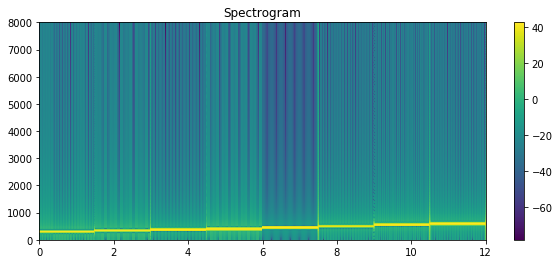

In [28]:
# Spectrogram of doremi
spectrum = 20 * np.log10(STFT(y_doremi))
plt.imshow(spectrum.T, origin='lower', aspect='auto', extent=[0, spectrum.size / fs, 0, 8000])
plt.title('Spectrogram')
plt.colorbar()

**View speech spectrogram**

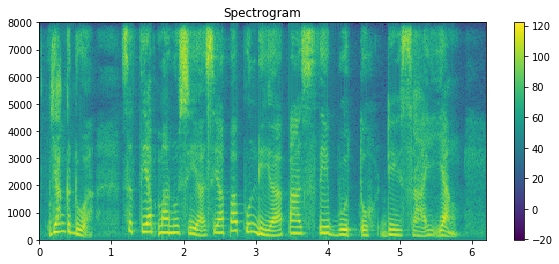

In [29]:
# Spectrogram of audio file
spectrum = 20 * np.log10(STFT(x))
plt.imshow(spectrum.T, origin='lower', aspect='auto', extent=[0, spectrum.size / fs, 0, 8000])
plt.title('Spectrogram')
plt.colorbar()

## Features : MFCC

Data representation plays major role on any speech system especially in speech recognition. Apart from spectrogram which is still oversized as a feature, **Mel-Frequency Cepstral Coefficients (MFCC)** were very popular. In a nutshell, spectrogram is processed further as a **band** representing the frequency distribution. Simply speaking, each frequency part in spectrogram is grouped. The group category might be linear or non-linear. Take a look at equalizer figure below,

![figure2](img/fig2.png)

<sub><b>figure 2</b> : image is taken from  https://community.spotify.com/t5/Closed-Ideas/Desktop-Equalizer-for-the-Desktop-Version/idi-p/1207205</sub>

But obviously it is not as easy as grouping bands. The procedure of obtaining MFCC is usually depicted in following steps,

![figure3](img/fig3.png)

<sub><b>figure 3</b> : image is taken from  http://recognize-speech.com/feature-extraction/mfcc</sub>

As we had finished the spectrogram part, now we jump into **Mel Scaling** and the rest. Let's start by the definition of **Mel Scale**. The <a href="https://en.wikipedia.org/wiki/Mel_scale"><b>Mel Scale</b></a> aims to mimic the non-linear human ear perception of sound (see <a href="https://en.wikipedia.org/wiki/Hair_cell">Cochlear Hair Cells</a>), by being discriminative at lower frequencies and less discriminative at higher frequencies.

In [30]:
from IPython.display import HTML
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/dyenMluFaUw?rel=0&amp;controls=0&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

Until this step, the frequency unit is in Hertz (Hz). We can convert between Hz ($f$) and Mel ($m$) using following equations :
$$m = 2595\ \log_{10}\left(1 + \frac{f}{700}\right)$$
$$f = 700\left(10^{\frac{m}{2595}}\ -\ 1\right)$$
This mel scale is applied to our spectrogram as a filter bank which look like,

![figure4](img/fig4.jpg)

<sub><b>figure 4</b> : image is taken from  http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html</sub>

Each filter in the filter bank is triangular shaped and ranging from 0 to 1.The center frequency has amplitude 1 and surrounding frequencies decrease gradually towards 0 till it intersect the adjacent filters. These filters can be mathematically modelled as <sup><a href='#3'>[2]</a></sup>

$$H_m(k) =
  \begin{cases}
      \hfill 0                                      \hfill & k < f(m - 1) \\
      \\
      \hfill \dfrac{k - f(m - 1)}{f(m) - f(m - 1)}  \hfill & f(m - 1) \leq k < f(m) \\
      \\
      \hfill 1                                      \hfill & k = f(m) \\
      \\
      \hfill \dfrac{f(m + 1) - k}{f(m + 1) - f(m)}  \hfill & f(m) < k \leq f(m + 1) \\
      \\
      \hfill 0                                      \hfill & k > f(m - 1) \\
  \end{cases}$$
  
No need to reinvent the wheel, we only use the implementation of the equation as shown in <a href="http://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html">here</a> with a little modification.

In [31]:
def filterbank(NFFT = 512, nfilt = 40, fs = 16000) :
    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (fs / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / fs)
    
    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    return fbank.T

**Apply the filter bank**

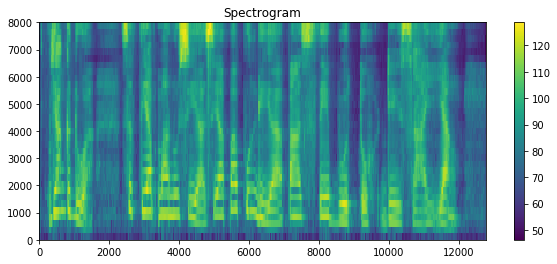

In [32]:
# Filterbank Spectrogram
spectrogram = np.dot(STFT(x), filterbank(N, nfilt=33, fs = fs))
spectrogram = 20 * np.log10(spectrogram)
plt.imshow(spectrogram.T, origin='lower', aspect='auto', extent=[0, spectrogram.size, 0, 8000])
plt.title('Spectrogram')
plt.colorbar()

![figure5](img/fig5.gif)

As mentioned before in figure 3, the next step is undergoing _Discrete Cosine Transform (DCT)_, scrapping $n$ number of coefficient, and liftering (see <a href="https://maxwell.ict.griffith.edu.au/spl/publications/papers/euro99_kkp_fbe.pdf">lifter</a>) the coefficient matrix. Commonly used lifter is notated as,
$$l_i = 1 + \frac{D}{2}\sin\left(\frac{\pi i}{D}\right) $$

**Create our lifter**

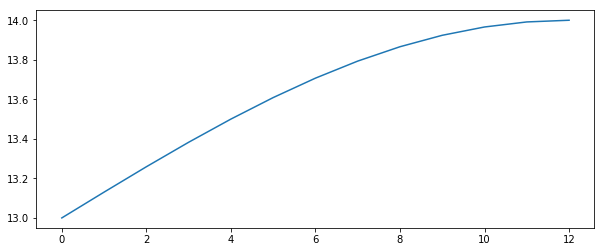

In [33]:
# Lifter for ncoeff = 13 and D = 24
ncoeff = 13
D = 24
lifter = 1 + (D/2) + np.sin(np.pi * np.arange(ncoeff) / D)
plt.plot(lifter)

**Wrap up our mfcc into function**

In [34]:
from scipy import fftpack
def mfcc(x, N = 512, ncoeff = 13, D = 24, fs = 16000):
    spectrogram = np.dot(STFT(x), filterbank(N, fs = fs))
    spectrogram = 20 * np.log10(spectrogram)
    mfcc = fftpack.dct(spectrogram, type = 2, axis = 1, norm = 'ortho')[:, 1 : (ncoeff + 1)]
    lifter = 1 + (D/2) + np.sin(np.pi * np.arange(ncoeff) / D)
    mfcc = np.multiply(mfcc, lifter)
    return mfcc

**Test the MFCC**

(387, 13)


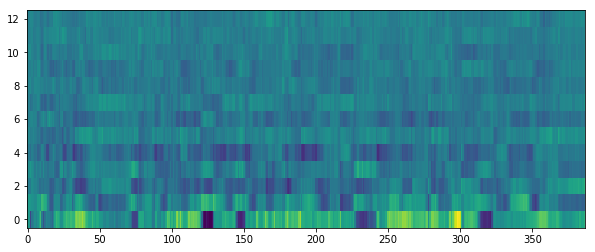

In [35]:
MFCC = mfcc(x)
print(MFCC.shape)
plt.imshow(MFCC.T, origin='lower', aspect='auto')

MFCCs oftenly came along with their delta ($\Delta$) and double delta ($\Delta^{2}$) to enhance feature robustness.

**Calculate the delta feature**

(386, 13)


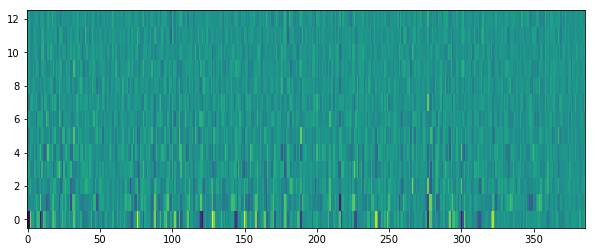

In [36]:
delta = np.diff(MFCC, axis=0)
print(delta.shape)
plt.imshow(delta.T, origin='lower', aspect='auto')

**Calculate the double delta**

(385, 13)


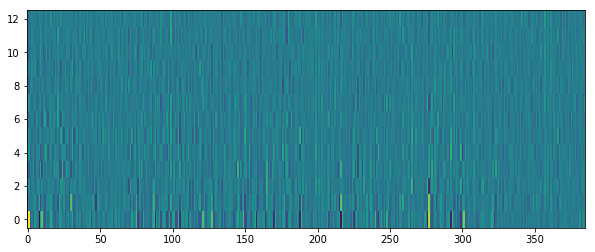

In [37]:
double_delta = np.diff(delta, axis=0)
print(double_delta.shape)
plt.imshow(double_delta.T, origin='lower', aspect='auto')

## Feature : Gaussian Model

In probability theory, normal distibuted data is commonly modelled by **Gauss Distribution** which is shaped like bell, concentrated in the center (_mean_), and balanced. It's a continuous function defined as 
$$f\left(x \mid \mu,\sigma\right)=\frac{1}{\sqrt{2\pi \sigma^{2}}}e^{-\frac{\left(x-\mu\right)^2}{2\sigma^{2}}}$$
where <br>

- $\mu$ is the mean(s) or centroid(s)
- $\sigma$ is the standard deviation(s) (or called covariance for higher dimension)
- $\sigma^{2}$ is the variance(s)

**View MFCC distribution**

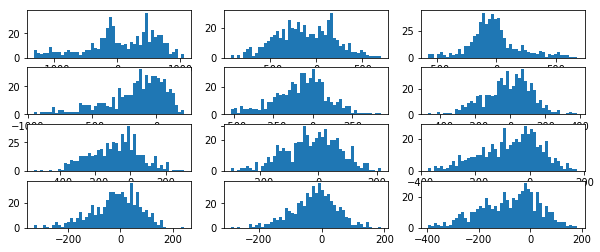

In [38]:
fs, michael = wav.read('data/librivox/michael-01.wav')
ncoeff = 12
michael_mfcc = mfcc(michael, ncoeff=ncoeff)
for i in range(ncoeff):
    plt.subplot(4,3,i + 1)
    plt.hist(michael_mfcc[:,i], bins=50)

**Again on different speaker**

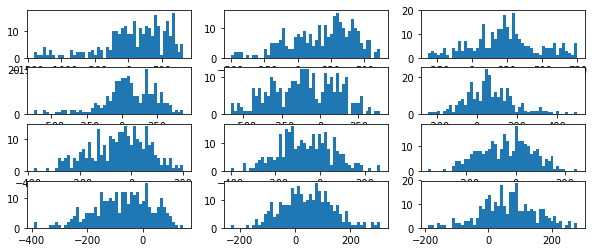

In [38]:
fs, charlie = wav.read('data/librivox/charlie-01.wav')
ncoeff = 12
charlie_mfcc = mfcc(charlie, ncoeff=ncoeff)
for i in range(ncoeff):
    plt.subplot(4,3,i + 1)
    plt.hist(charlie_mfcc[:,i], bins=50)

# Example : Speaker Identification

**Prepare the data based on metadata**

In [39]:
# Data preparation

import csv

ncoeff = 13
with open('data/librivox/metadata.csv') as meta:
    reader = csv.reader(meta)
    next(reader, None)
    with open('data/librivox/data.csv', 'w') as data:
        data.write('file,mu0,mu1,mu2,mu3,mu4,mu5,mu6,mu7,mu8,mu9,mu10,mu11,mu12,id\n')
        for item in reader:
            data.write(item[0]+",")
            _, s = wav.read("data/librivox/" + item[0])
            feat = mfcc(s, ncoeff=ncoeff)
            for i in range(ncoeff):
                data.write("%.2f" %np.mean(feat[:,i]))
                data.write(",")
            data.write("%s\n" %item[2])

**Utilize pandas to create dataframes**

In [40]:
import pandas as pd
features = pd.read_csv('data/librivox/data.csv')

**Normalize numeric data**

In [41]:
col = features.columns[1:-1]
features[col] = features[col].apply(lambda x : (x - x.min()) / (x.max() - x.min()))

**See unique value(s) in id**

In [42]:
features['id'].unique()

array(['CHARLIE', 'MICHAEL'], dtype=object)

**Transform the name label into binary / numeric feature**

In [43]:
def transform_label(label) :
    if label == 'CHARLIE' :
        return 0
    else :
        return 1

**Apply the transformation function**

In [44]:
features['id'] = features['id'].apply(transform_label)

**Group input features**

In [45]:
input_features = features.drop(['file', 'id'], axis=1).values

**Group labels**

In [46]:
output_features = [ [i, -(i-1)] for i in features['id'].values]

**Split training and testing data**

In [47]:
from sklearn.model_selection import train_test_split
X, X_test, Y, Y_test = train_test_split(input_features, output_features, test_size=0.3, random_state=42)

**Build our basic MLP**

In [48]:
import tensorflow as tf

# Parameters
learning_rate = 0.001
training_epochs = 1000
batch_size = 4
display_step = 50

# Network Parameters
n_hidden_1 = 10 # 1st layer number of features
n_hidden_2 = 10 # 2nd layer number of features
n_input = 13 # Number of feature
n_classes = 2 # Number of classes to predict

# tf Graph input
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

# Create model
def multilayer_perceptron(x, weights, biases):
    # Hidden layer with RELU activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    # Hidden layer with RELU activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    # Output layer with linear activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

# Store layers weight & bias
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

# Construct model
pred = multilayer_perceptron(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

# Initializing the variables
init = tf.global_variables_initializer()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



**Train the model**

In [49]:
# Launch the graph

with tf.Session() as sess:
    sess.run(init)
    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(len(X)/batch_size)
        X_batches = np.array_split(X, total_batch)
        Y_batches = np.array_split(Y, total_batch)
        # Loop over all batches
        for i in range(total_batch):
            batch_x, batch_y = X_batches[i], Y_batches[i]
            # Run optimization op (backprop) and cost op (to get loss value)
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x,
                                                          y: batch_y})
            # Compute average loss
            avg_cost += c / total_batch
        # Display logs per epoch step
        if epoch % display_step == 0:
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(avg_cost))
    print("Optimization Finished!")
   
    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    # Calculate accuracy
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print("Accuracy:", accuracy.eval({x: X_test, y: Y_test}))
    global result 
    result = tf.argmax(pred, 1).eval({x: X_test, y: Y_test})

Epoch: 0001 cost= 5.419475198
Epoch: 0051 cost= 0.017801848
Epoch: 0101 cost= 0.005576521
Epoch: 0151 cost= 0.003244683
Epoch: 0201 cost= 0.002317928
Epoch: 0251 cost= 0.001815990
Epoch: 0301 cost= 0.001492846
Epoch: 0351 cost= 0.001246879
Epoch: 0401 cost= 0.001025351
Epoch: 0451 cost= 0.000853520
Epoch: 0501 cost= 0.000717087
Epoch: 0551 cost= 0.000606305
Epoch: 0601 cost= 0.000514075
Epoch: 0651 cost= 0.000435822
Epoch: 0701 cost= 0.000369013
Epoch: 0751 cost= 0.000311974
Epoch: 0801 cost= 0.000263226
Epoch: 0851 cost= 0.000221602
Epoch: 0901 cost= 0.000186205
Epoch: 0951 cost= 0.000156093
Optimization Finished!
Accuracy: 1.0


<h2>Bibliograph</h2><br>

<div id="1">[1] Jont B. Allen (June 1977). "Short Time Spectral Analysis, Synthesis, and Modification by Discrete Fourier Transform". IEEE Transactions on Acoustics, Speech, and Signal Processing. ASSP-25 (3): 235–238.</div>

<div id="2">[2] Enochson, Loren D.; Otnes, Robert K. (1968). Programming and Analysis for Digital Time Series Data. U.S. Dept. of Defense, Shock and Vibration Info. Center. p. 142.</div>

<div id="3">[3] http://practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/</div>

<div id="4">[4] https://github.com/soerendip/Tensorflow-binary-classification/blob/master/Tensorflow-binary-classification-model.ipynb</div>